#### Project : Crude Oil Price Prediction

In [3]:
#Import Libraries
import pandas as pd
import seaborn as sns
from pandas import read_csv
from pandas import read_excel
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas import DataFrame
from pandas import Grouper

/var/folders/hl/cn9p9pcd0l35bxdphn5y3rgh0000gp/T/ipykernel_74067/168322934.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
dfm = read_excel(r"C:\Users\Yash\Desktop\ExcelR Project\Codes\RWTCm.xls")
dfm.head()

,Date,COSP
0,1986-01-15,22.93
1,1986-02-15,15.46
2,1986-03-15,12.61
3,1986-04-15,12.84
4,1986-05-15,15.38


In [5]:
dfm.shape

(456, 2)

In [6]:
dfm.dtypes

Date    datetime64[ns]
COSP           float64
dtype: object

In [7]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    456 non-null    datetime64[ns]
 1   COSP    456 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.2 KB


In [8]:
dfm[dfm.duplicated()].shape

(0, 2)

In [9]:
dfm.describe()

,COSP
count,456.000000
mean,46.886338
std,29.567799
min,11.350000
25%,20.085000
50%,38.170000
75%,70.375000
max,133.880000


In [10]:
dfm.isnull().sum()

Date    0
COSP    0
dtype: int64

# Feature Engineering

In [11]:
#Make 'Date' as 'DateTime index' for the Dataframe
df = dfm.copy()
df.set_index('Date', inplace=True)
df.index.year

Int64Index([1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='Date', length=456)

In [12]:
df.head()

,COSP
Date,
1986-01-15,22.93
1986-02-15,15.46
1986-03-15,12.61
1986-04-15,12.84
1986-05-15,15.38


In [13]:
#Separate Month and Year into Separate Column for Visualisation & to extract meaningful insights from data
dfm["Date"]  = pd.to_datetime(dfm.Date, format="%b-%y")
dfm["month"] = dfm.Date.dt.strftime("%b") # month extraction
dfm["year"]  = dfm.Date.dt.strftime("%Y") # year extraction
dfm.head(10)

,Date,COSP,month,year
0,1986-01-15,22.93,Jan,1986
1,1986-02-15,15.46,Feb,1986
2,1986-03-15,12.61,Mar,1986
3,1986-04-15,12.84,Apr,1986
4,1986-05-15,15.38,May,1986
5,1986-06-15,13.43,Jun,1986
6,1986-07-15,11.59,Jul,1986
7,1986-08-15,15.10,Aug,1986
8,1986-09-15,14.87,Sep,1986
9,1986-10-15,14.90,Oct,1986


#   Visualisation

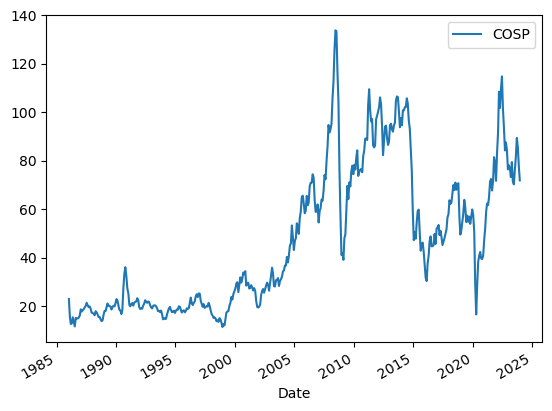

In [14]:
# line plot of time series
df.plot()
pyplot.show()

#### Observation: 
1. We can see there is an increasing Trend. 
2. Variance is also not constant. 
Hence, the Time series is NOT Stationary.

### Histogram and Density Plot

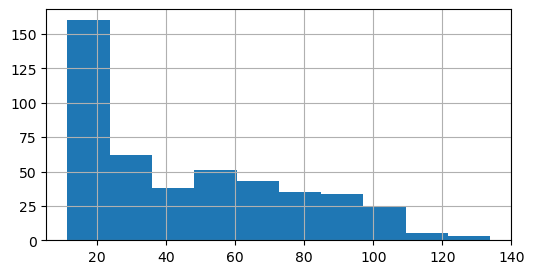

In [15]:
dfm.COSP.hist(figsize=(6,3))
plt.show()

In [16]:
### Distribution is skewed. We need to check if this will get better with transformation.

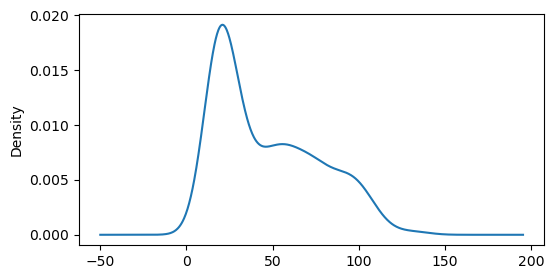

In [17]:
dfm.COSP.plot(kind='kde', figsize=(6,3))
plt.show()

<AxesSubplot:xlabel='month', ylabel='year'>

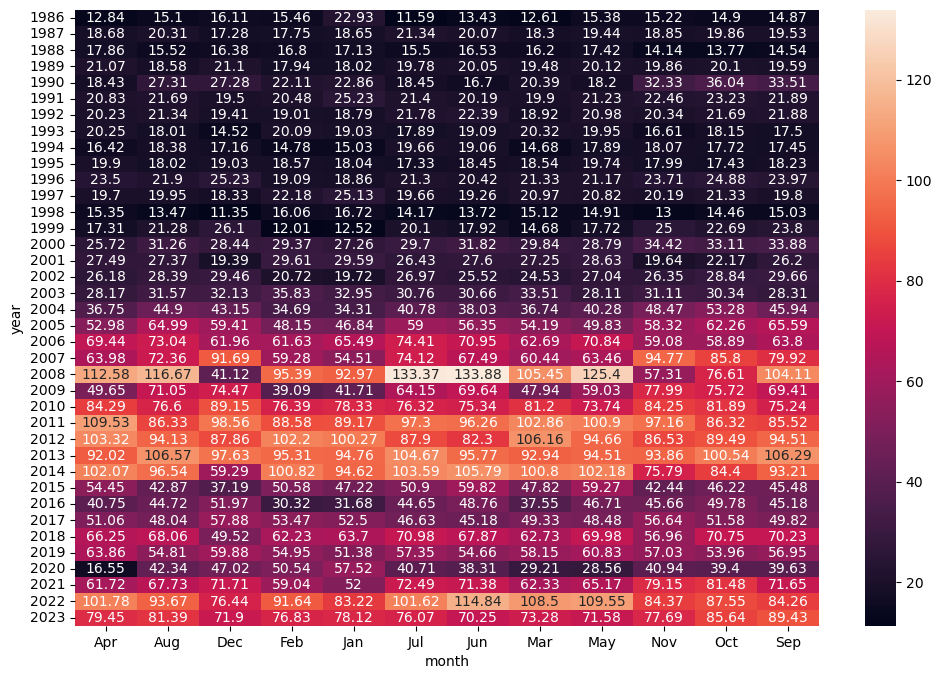

In [18]:
# Heat Map
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=dfm,values="COSP",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


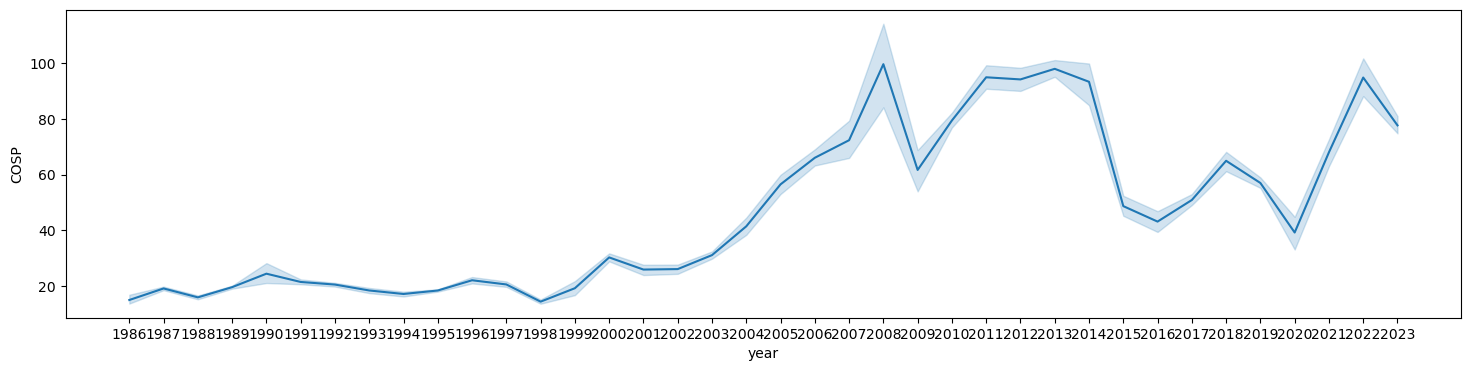

In [19]:
# Line Plot 
plt.figure(figsize=(18,4))
sns.lineplot(x="year", y="COSP", data=dfm)
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [20]:
df1 = read_excel(r"C:\Users\Yash\Desktop\ExcelR Project\Codes\RWTCm.xls",index_col='Date',parse_dates=True)

# create a boxplot of yearly data

groups = df1.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = (group.values.flatten())
years

,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,22.93,18.65,17.13,18.02,22.86,25.23,18.79,19.03,15.03,18.04,...,94.62,47.22,31.68,52.50,63.70,51.38,57.52,52.00,83.22,78.12
1,15.46,17.75,16.80,17.94,22.11,20.48,19.01,20.09,14.78,18.57,...,100.82,50.58,30.32,53.47,62.23,54.95,50.54,59.04,91.64,76.83
2,12.61,18.30,16.20,19.48,20.39,19.90,18.92,20.32,14.68,18.54,...,100.80,47.82,37.55,49.33,62.73,58.15,29.21,62.33,108.50,73.28
3,12.84,18.68,17.86,21.07,18.43,20.83,20.23,20.25,16.42,19.90,...,102.07,54.45,40.75,51.06,66.25,63.86,16.55,61.72,101.78,79.45
4,15.38,19.44,17.42,20.12,18.20,21.23,20.98,19.95,17.89,19.74,...,102.18,59.27,46.71,48.48,69.98,60.83,28.56,65.17,109.55,71.58
5,13.43,20.07,16.53,20.05,16.70,20.19,22.39,19.09,19.06,18.45,...,105.79,59.82,48.76,45.18,67.87,54.66,38.31,71.38,114.84,70.25
6,11.59,21.34,15.50,19.78,18.45,21.40,21.78,17.89,19.66,17.33,...,103.59,50.90,44.65,46.63,70.98,57.35,40.71,72.49,101.62,76.07
7,15.10,20.31,15.52,18.58,27.31,21.69,21.34,18.01,18.38,18.02,...,96.54,42.87,44.72,48.04,68.06,54.81,42.34,67.73,93.67,81.39
8,14.87,19.53,14.54,19.59,33.51,21.89,21.88,17.50,17.45,18.23,...,93.21,45.48,45.18,49.82,70.23,56.95,39.63,71.65,84.26,89.43
9,14.90,19.86,13.77,20.10,36.04,23.23,21.69,18.15,17.72,17.43,...,84.40,46.22,49.78,51.58,70.75,53.96,39.40,81.48,87.55,85.64


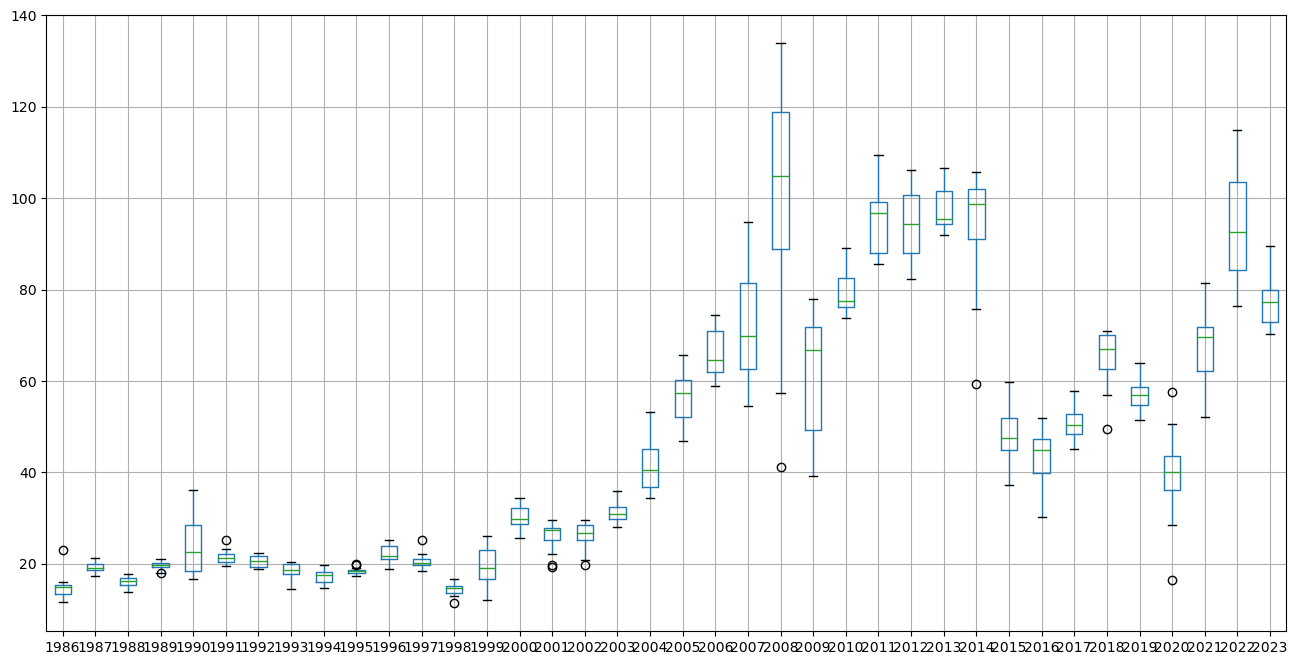

In [21]:
years.boxplot(figsize=(16,8))
plt.show()

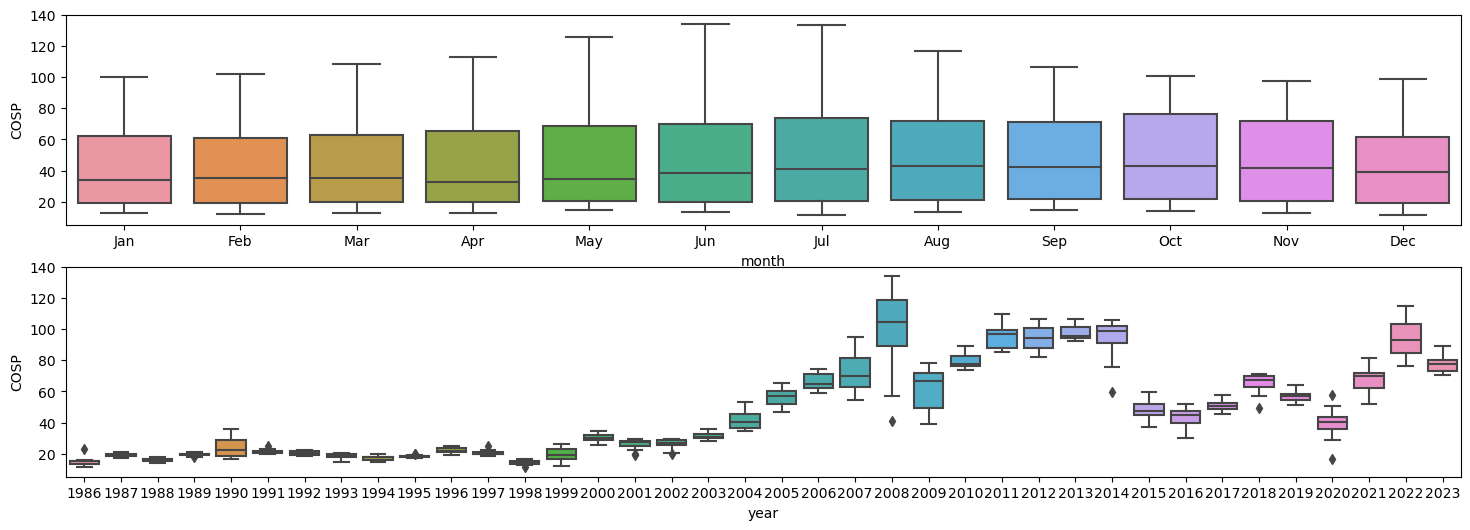

In [22]:
# Boxplot
plt.figure(figsize=(18,6))
plt.subplot(211)
sns.boxplot(x="month", y="COSP", data=dfm)
plt.subplot(212)
sns.boxplot(x="year", y="COSP", data=dfm)
plt.show()

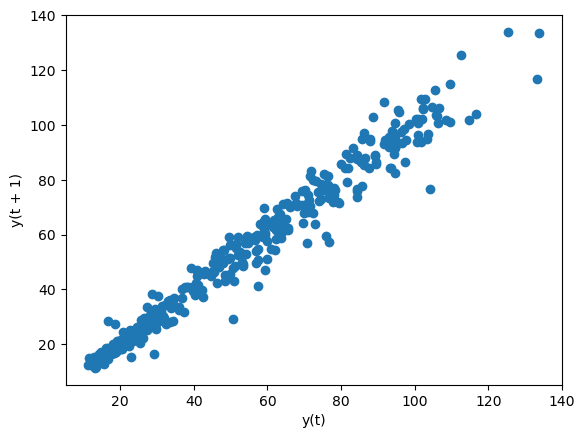

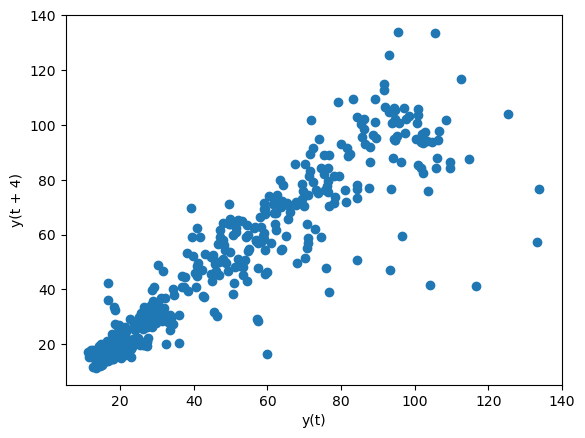

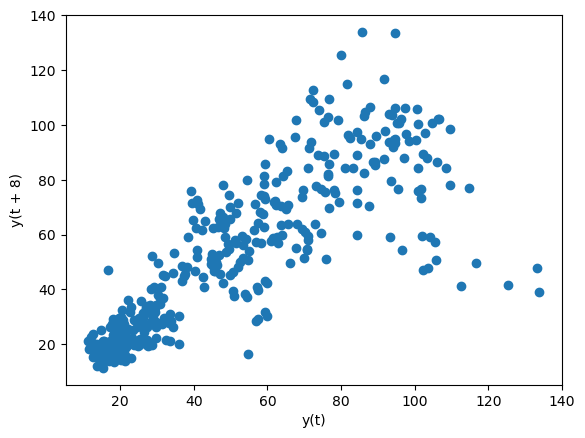

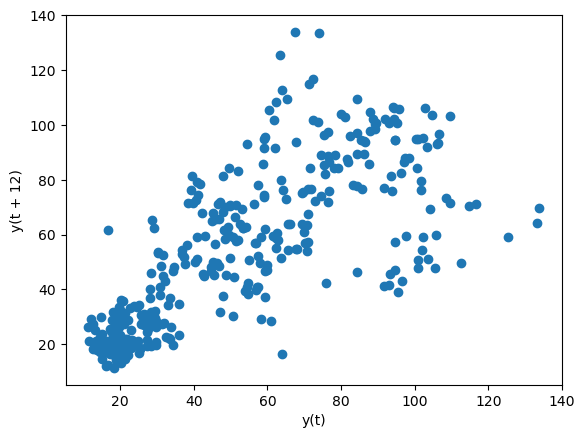

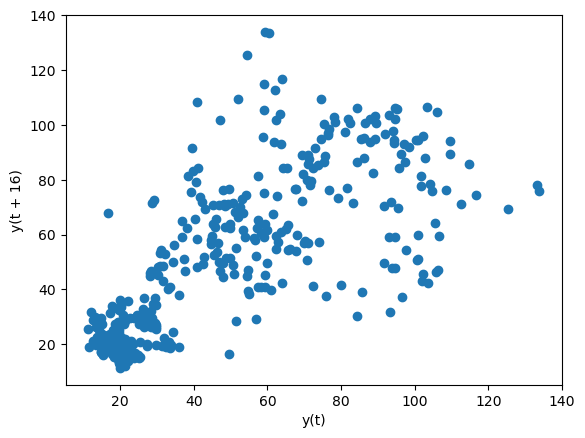

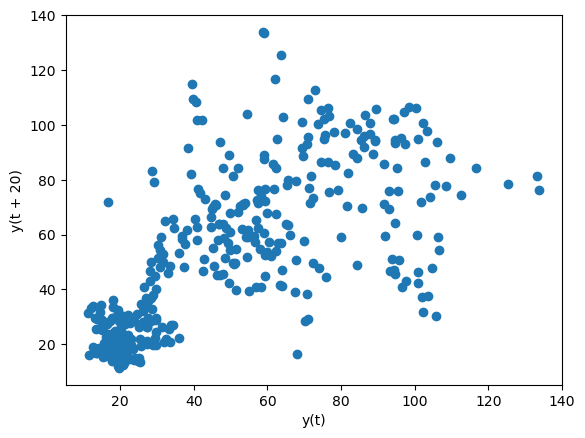

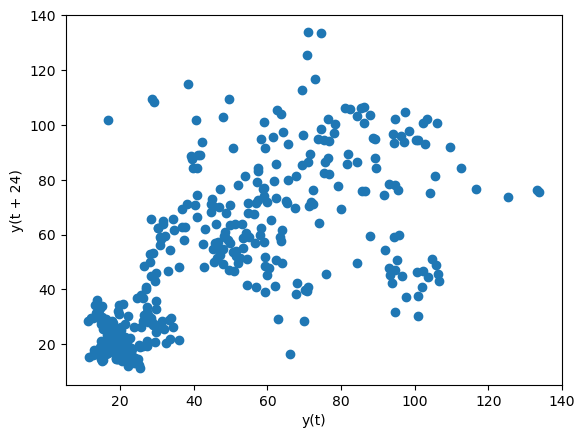

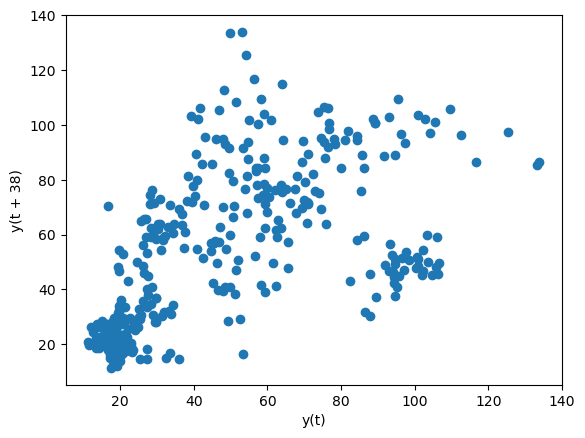

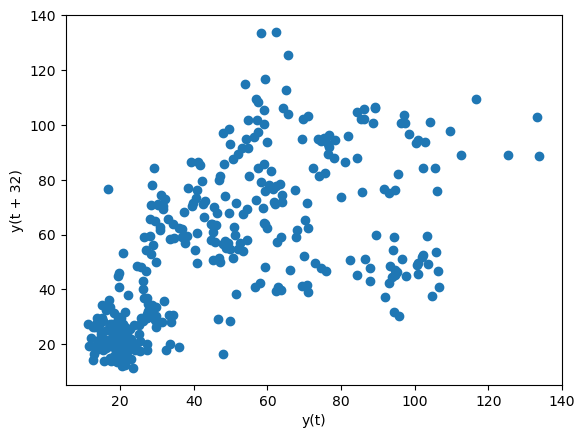

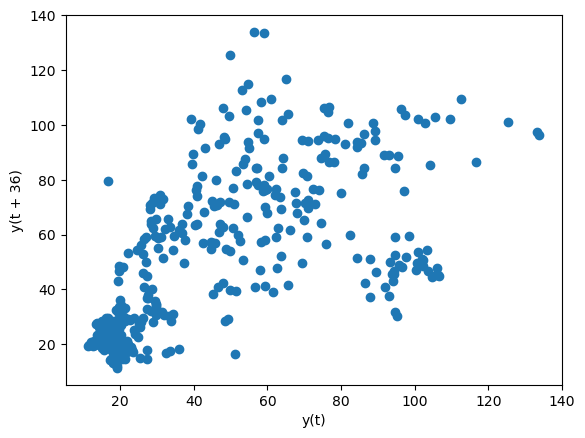

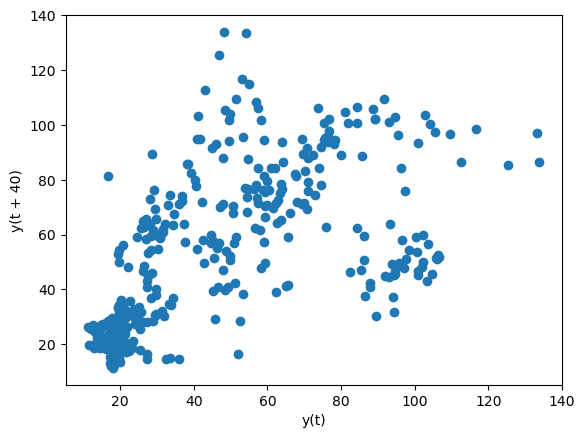

In [23]:
# Lag Plot
from pandas.plotting import lag_plot
# create a scatter plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(12,8))
    lag_plot(dfm.COSP, lag=i)
    plt.show()

/Users/vaishalimukherjee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


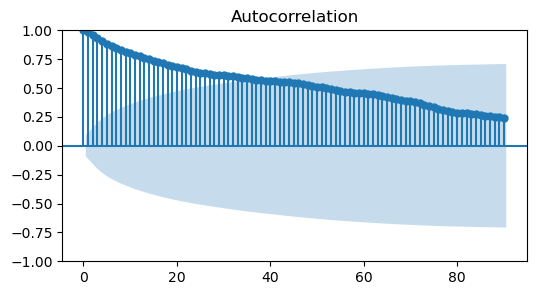

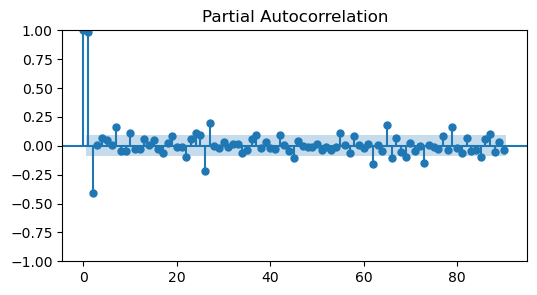

In [24]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(6,3))
    tsa_plots.plot_acf(dfm.COSP,lags=90)
    tsa_plots.plot_pacf(dfm.COSP,lags=90)
    plt.show()

#### There is significant correlation between the time series and its lagged version of itself. This dataset is good for time series forecasting

### UpSampling Monthly to Daily

In [25]:
# upsampling from monthly to daily
upsampled = df.resample('D').mean()
print(upsampled.head(32))


             COSP
Date             
1986-01-15  22.93
1986-01-16    NaN
1986-01-17    NaN
1986-01-18    NaN
1986-01-19    NaN
1986-01-20    NaN
1986-01-21    NaN
1986-01-22    NaN
1986-01-23    NaN
1986-01-24    NaN
1986-01-25    NaN
1986-01-26    NaN
1986-01-27    NaN
1986-01-28    NaN
1986-01-29    NaN
1986-01-30    NaN
1986-01-31    NaN
1986-02-01    NaN
1986-02-02    NaN
1986-02-03    NaN
1986-02-04    NaN
1986-02-05    NaN
1986-02-06    NaN
1986-02-07    NaN
1986-02-08    NaN
1986-02-09    NaN
1986-02-10    NaN
1986-02-11    NaN
1986-02-12    NaN
1986-02-13    NaN
1986-02-14    NaN
1986-02-15  15.46


In [26]:
upsampled.shape

(13849, 1)

##### interpolate the missing value

                 COSP
Date                 
1986-01-15  22.930000
1986-01-16  22.689032
1986-01-17  22.448065
1986-01-18  22.207097
1986-01-19  21.966129
1986-01-20  21.725161
1986-01-21  21.484194
1986-01-22  21.243226
1986-01-23  21.002258
1986-01-24  20.761290
1986-01-25  20.520323
1986-01-26  20.279355
1986-01-27  20.038387
1986-01-28  19.797419
1986-01-29  19.556452
1986-01-30  19.315484
1986-01-31  19.074516
1986-02-01  18.833548
1986-02-02  18.592581
1986-02-03  18.351613
1986-02-04  18.110645
1986-02-05  17.869677
1986-02-06  17.628710
1986-02-07  17.387742
1986-02-08  17.146774
1986-02-09  16.905806
1986-02-10  16.664839
1986-02-11  16.423871
1986-02-12  16.182903
1986-02-13  15.941935
1986-02-14  15.700968
1986-02-15  15.460000


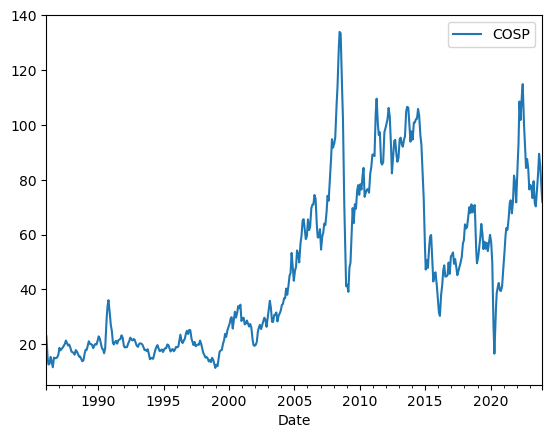

In [27]:
# Interpolate to get the intermediate daily values
dfd = upsampled.interpolate(method='linear')
print(dfd.head(32))
dfd.plot()
pyplot.show()

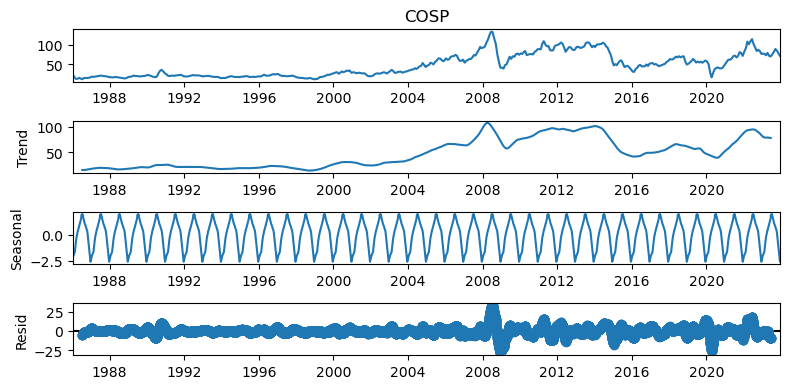

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

with plt.rc_context():
    plt.rc("figure", figsize=(8,4))
    result = seasonal_decompose(dfd.COSP, period=365,model='additive')  # model='add' also works
    result.plot()

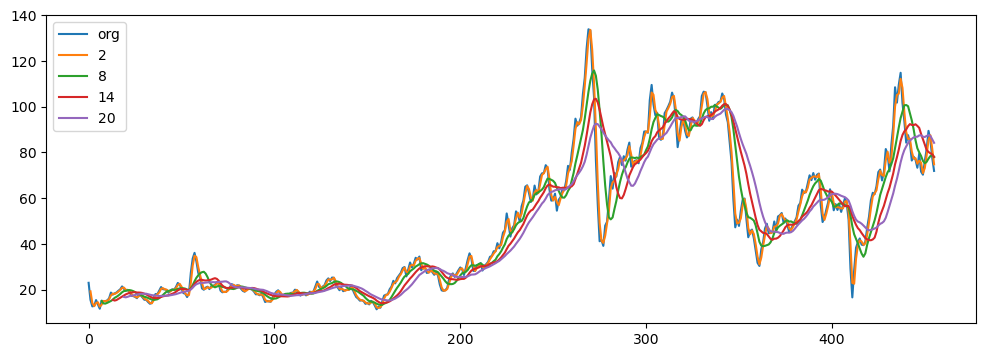

In [29]:
# Moving Average
plt.figure(figsize=(12,4))
dfm.COSP.plot(label="org")
for i in range(2,24,6):
    dfm["COSP"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Split Train Test Data

In [30]:
#Splitting Train and Test Data
size = 432
train_data = df1[:size]
test_data = df1[size:]

In [31]:
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: 1986-01-15 00:00:00 2021-12-15 00:00:00 
 Test: 2022-01-15 00:00:00 2023-12-15 00:00:00


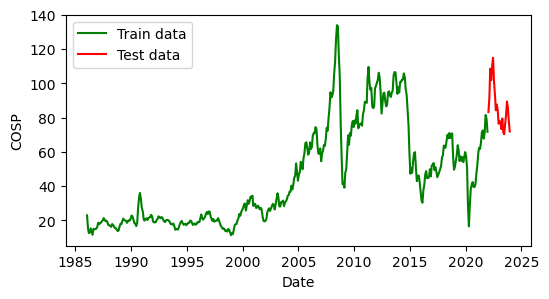

In [32]:
plt.figure(figsize=(6,3))
plt.xlabel('Date')
plt.ylabel('COSP')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

# Tranformations

In [35]:
# load and plot a time series
from pandas import read_csv
from matplotlib import pyplot

In [36]:
df = read_csv('RWTCm.csv', header=0, index_col=0, parse_dates=True)

In [37]:
df.head()

,COSP
Date,
Jan-86,22.93
Feb-86,15.46
Mar-86,12.61
Apr-86,12.84
May-86,15.38


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 456 entries, Jan-86 to Dec-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   COSP    456 non-null    float64
dtypes: float64(1)
memory usage: 7.1+ KB


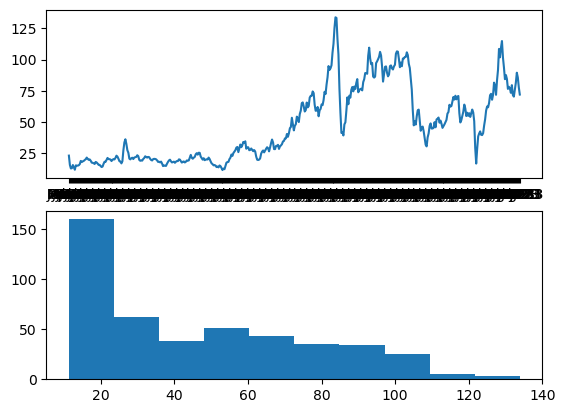

In [39]:
# line plot
pyplot.subplot(211)
pyplot.plot(df)
# histogram
pyplot.subplot(212)
pyplot.hist(df)
pyplot.show()

#### Square Root Transform

In [40]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

In [41]:
dataframe = DataFrame(df.values)
dataframe.columns = ['COSP']
dataframe['COSP'] = sqrt(dataframe['COSP'])

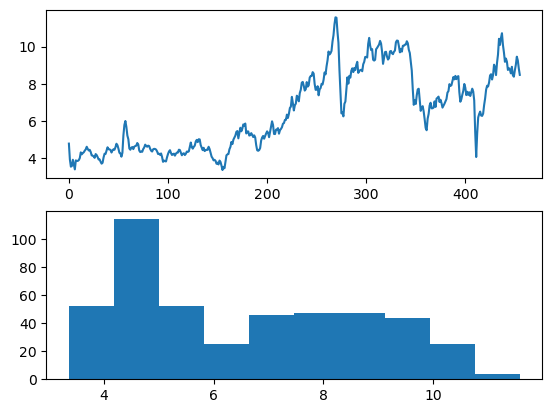

In [42]:
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['COSP'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['COSP'])
pyplot.show()

#### Log Transform

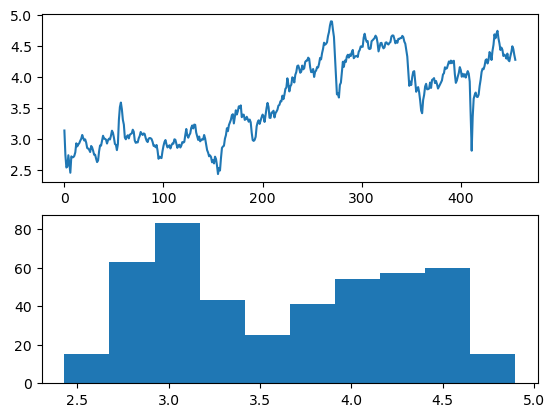

In [43]:
from numpy import log
dataframe = DataFrame(df.values)
dataframe.columns = ['COSP']
dataframe['COSP'] = log(dataframe['COSP'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['COSP'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['COSP'])
pyplot.show()